In [64]:
import datetime

import numpy as np
import pandas_datareader.data as web
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
# start = datetime.date.today() - datetime.timedelta(days=5 * 365)
# end = datetime.date.today()
start = datetime.date(2017, 1, 23)
end = datetime.date(2022, 1, 20)
df = web.DataReader(["sp500", "NASDAQCOM", "CBBTCUSD"], "fred", start, end)

In [66]:
df.tail()

,sp500,NASDAQCOM,CBBTCUSD
DATE,,,
2022-01-16,NaN,NaN,43137.67
2022-01-17,NaN,NaN,42285.47
2022-01-18,4577.11,14506.90,42411.61
2022-01-19,4532.76,14340.26,41723.49
2022-01-20,4482.73,14154.02,40696.22


In [67]:
# convert this dataframe to a returns dataframe
df = df.dropna()  # drop weekends, holidays etc.
df["SP500"] = np.log(df.sp500) - np.log(df.sp500.shift(1))
df["NASDAQ"] = np.log(df.NASDAQCOM) - np.log(df.NASDAQCOM.shift(1))
df["Bitcoin"] = np.log(df.CBBTCUSD) - np.log(df.CBBTCUSD.shift(1))
df = df.iloc[1:, 3:]  # drop the first row and drop the old 3 price columns.
df.head()

,SP500,NASDAQ,Bitcoin
DATE,,,
2017-01-24,0.006543,0.008610,-0.026369
2017-01-25,0.007994,0.009839,0.010095
2017-01-26,-0.000736,-0.000205,0.023189
2017-01-27,-0.000867,0.000990,0.006099
2017-01-30,-0.006028,-0.008350,0.000650


<AxesSubplot:xlabel='DATE'>

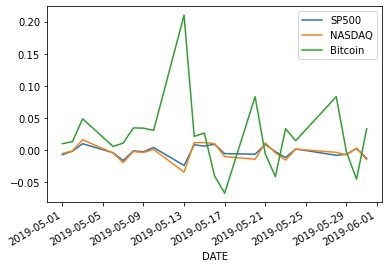

In [68]:
# plot a 30 day change of returns
df["2019-05-01":"2019-05-31"].plot()

$\sigma^2 = \frac{\sum(x_i - \overline{x})^2}{n-1}$

where

$\sigma^2$ = Sample Variance </br>
$x_i$ = value of one observation </br>
$\overline{x}$ = mean of all observations </br>
$n$ = number of observations </br>

(-0.5, 0.5)

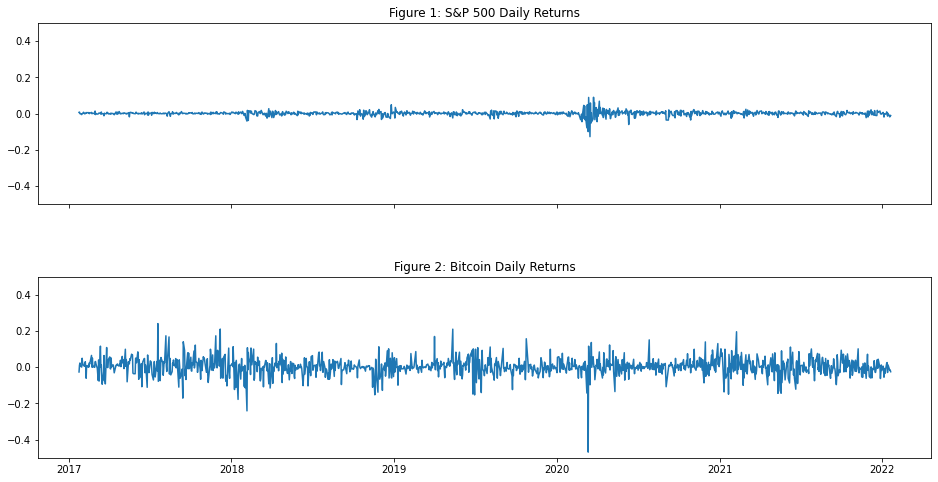

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(df["SP500"])
axs[1].plot(df["Bitcoin"])
axs[0].set_title("Figure 1: S&P 500 Daily Returns")
axs[1].set_title("Figure 2: Bitcoin Daily Returns")
plt.subplots_adjust(hspace = 0.4)
axs[0].set_ylim(-0.5, 0.5)

## Covariance and Correlation ##
\
$cov(x, y) = \large\frac{\sum(x_{i}-\overline{x})(y_{i}-\overline{y})}{N-1}$

where

$x_i$ = value of one observation of $x$  </br>
$y_i$ = value of one observation of $y$ </br>
$\overline{x}$ = mean of $x$ </br>
$\overline{y}$ = mean of $y$ </br>
$N$ = number of observations </br>

In [70]:
df.head()

,SP500,NASDAQ,Bitcoin
DATE,,,
2017-01-24,0.006543,0.008610,-0.026369
2017-01-25,0.007994,0.009839,0.010095
2017-01-26,-0.000736,-0.000205,0.023189
2017-01-27,-0.000867,0.000990,0.006099
2017-01-30,-0.006028,-0.008350,0.000650


In [71]:
# Covariance matrix
df.cov()

,SP500,NASDAQ,Bitcoin
SP500,0.000150,0.000160,0.000121
NASDAQ,0.000160,0.000193,0.000142
Bitcoin,0.000121,0.000142,0.002481


$\large\rho_{_{X,Y}} = \frac{cov(X,Y)}{\sigma_{_{X}} \sigma_{_{Y}}}$

\
where\
\
$X$ and $Y$ are random variables representing returns of two different assets.\
$cov$ = Covariance </br>
$\sigma_{_{X}}$ = Standard Deviation of $X$ </br>
$\sigma_{_{Y}}$ = Standard Deviation of $Y$ </br>

In [72]:
# Correlation matrix
df.corr()

,SP500,NASDAQ,Bitcoin
SP500,1.000000,0.943390,0.198172
NASDAQ,0.943390,1.000000,0.204888
Bitcoin,0.198172,0.204888,1.000000


Text(0, 0.5, 'NASDAQ')

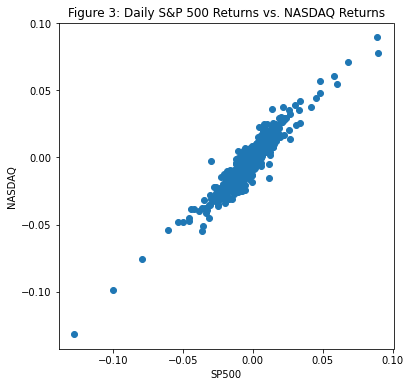

In [73]:
# Scatterplot the returns between SP500 and NDQ
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(df["SP500"], df["NASDAQ"])
ax.set_title("Figure 3: Daily S&P 500 Returns vs. NASDAQ Returns")
ax.set_xlabel("SP500")
ax.set_ylabel("NASDAQ")

In [74]:
print(df.var())
print(type(df.var()))
var_array = np.array(df.var())
print("var_array:", var_array)

SP500      0.000150
NASDAQ     0.000193
Bitcoin    0.002481
dtype: float64
<class 'pandas.core.series.Series'>
var_array: [0.00014992 0.00019297 0.0024805 ]


## Sharpe Ratio ##

$\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$

where

$R_p$ = Return of the portfolio </br>
$R_f$ = Risk-free Rate </br>
$\sigma_p$ = Standard Deviation of the Portfolio </br>

In [75]:
print("Sharpe Ratios of the Assets:")
print(df.mean() / df.std())

Sharpe Ratios of the Assets:
SP500      0.044348
NASDAQ     0.053585
Bitcoin    0.060693
dtype: float64


## Semivariance ##

$\text{Semivariance} = \frac{1}{n} \sum_{r_i < \overline{r}}^{n} (r_i - \overline{r})^2$

where

$r_i$ = value of one observation  </br>
$\overline{r}$ = mean of all observations  </br>
$n$ = number of observations

In [76]:
print("Semivariance of the SP500:")
sp500_mean = df["SP500"].mean()
sp500_semivariance = ((df[df["SP500"] < sp500_mean]["SP500"] - sp500_mean)**2).mean()
print(sp500_semivariance)

Semivariance of the SP500:
0.0001837115112352176


In [77]:
print("Semivariance of Bitcoin:")
btc_mean = df["Bitcoin"].mean()
btc_semivariance = ((df[df["Bitcoin"] < btc_mean]["Bitcoin"] - btc_mean)**2).mean()
print(btc_semivariance)

Semivariance of the Bitcoin:
0.002588983030799899
